In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import h5py  
import pandas as pd
import numpy as np
import os

In [2]:
#os.chdir(r"C:\Users\Zakhar\Documents\GitHub\POP23\TESTS")
os.chdir("/home/zah/POP23/TESTS/")
#df = pd.read_pickle("dataframe_fidelity_tests_D20.pkl")
#df = pd.read_pickle("dataframe_fidelity_REG_tests_D20.pkl")
#df = pd.read_pickle("dataframe_fidelity_g_tests_D20.pkl")
#df = pd.read_pickle("dataframe_fix-phase-reg001_fidelity__tests_D20.pkl")

#df = pd.read_pickle("dataframe-fix-phase_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe-T-zero-fix-Phi_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe-fix-Phi_up_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe-just-zero-down_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe-T-0-fix-Phi-up_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe-T-0-fix-Phi-diag_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe-fix-Phi-up_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe_T0-fix-Phi-diag_fidelity_tests_D20.pkl")

#df = pd.read_pickle("dataframe_T0-fix-Phi-up_fidelity_tests_D20.pkl")



#df = pd.read_pickle("dataframe_Ansatz_fidelity_tests_D20.pkl")

In [3]:
df

,Gamma,State,Time,gt,F_lme_exact,InF_lme_exact,F_sidexact_exact,InF_sidexact_exact,F_sidlme_lme,InF_sidlme_lme,Distance
0,0.079477,1,0.06000,0.004769,1.000000,6.039613e-14,1.000000,6.039613e-14,1.000000,6.039613e-14,0.341925
1,0.079477,1,0.08000,0.006358,0.999997,2.694844e-06,1.000000,1.012416e-08,0.999998,1.580797e-06,0.341925
2,0.079477,1,0.10000,0.007948,0.999982,1.777234e-05,1.000000,1.510201e-07,0.999994,5.868606e-06,0.341925
3,0.079477,1,0.12000,0.009537,0.999972,2.793938e-05,1.000000,8.100157e-08,0.999988,1.234746e-05,0.341925
4,0.079477,1,0.14000,0.011127,0.999986,1.365625e-05,0.999996,3.746357e-06,0.999979,2.065111e-05,0.341925
...,...,...,...,...,...,...,...,...,...,...,...
751,79.477,9,0.23800,18.915526,0.788154,2.118457e-01,0.999996,4.393572e-06,1.000000,1.000000e-15,0.277180
752,79.477,9,0.23825,18.935395,0.788127,2.118732e-01,0.999995,4.520843e-06,1.000000,1.000000e-15,0.277180
753,79.477,9,0.23850,18.955264,0.788101,2.118987e-01,0.999995,4.640947e-06,1.000000,1.000000e-15,0.277180
754,79.477,9,0.23875,18.975134,0.788078,2.119222e-01,0.999995,4.753286e-06,1.000000,1.000000e-15,0.277180


In [6]:
df[df.Gamma == "0.079477"].F_sidexact_exact.min()

0.9824890842615868

In [3]:
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

df.replace(to_replace= '0.079477', value = '0.079', inplace=True )
df.replace(to_replace= '0.79477', value = '0.795', inplace=True )
df.replace(to_replace= '0.25133', value = '0.251', inplace=True )
df.replace(to_replace= '2.5133', value = '2.513', inplace=True )
df.replace(to_replace= '7.9477', value = '7.948', inplace=True )

df['Gamma'] = df['Gamma'].astype(float)

df['Infidelity'] = df['Infidelity'].abs()

df['Log_Infidelity'] = np.log10(df['Infidelity'])

df.loc[df["Log_Infidelity"] < -12, "Log_Infidelity"] = -12

pd.unique(df["Gamma"])

/home/zah/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


array([7.9000e-02, 2.5100e-01, 7.9500e-01, 2.5130e+00, 2.5133e+01,
       2.5133e+02, 7.9480e+00, 7.9477e+01])

In [4]:
def log_infidelity_from_gamma(df, title):
   
    fig, ax = plt.subplots(1, 1, figsize=(6,6))
    
    sns.violinplot(ax=ax, data=df, x="Gamma", y="Log_Infidelity", cut = 0, # hue = "Method", split=True,
                        scale="width", palette ="cool", linewidth=0.5,
                        inner= None, bw="silverman")
    
    ymin = -6
    ymax = -0.1
    
    tick_range = np.arange(ymin, ymax)
    ax.yaxis.set_ticks(tick_range, [r'$10^{-6}$', r'$10^{-5}$', r'$10^{-4}$', r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$',])
    ax.yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)

    ax.set_title(title)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel(r'Coupling $\gamma$')
    ax.set_ylabel(r'Infidelity $(1-F)$')
    
    ax.hlines(y=np.log10(.01), xmin=-0.5, xmax=6.5, colors='black', linestyles='--', alpha=0.8)
    ax.text(6.7, np.log10(.01), '0.01', ha='left', va='center')
    
    ax.hlines(y=np.log10(.02), xmin=-0.5, xmax=6.5, colors='black', linestyles='--', alpha=0.8)
    ax.text(6.7, np.log10(.02), '0.02', ha='left', va='center')
 
    return fig

/tmp/ipykernel_9724/1657810983.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


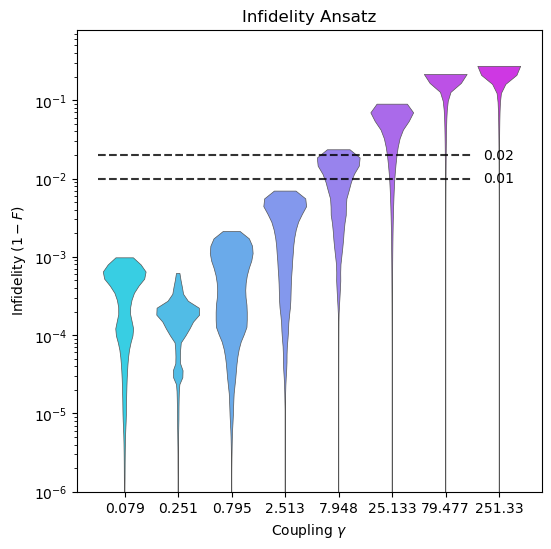

In [5]:
fig = log_infidelity_from_gamma(df, "Infidelity Ansatz")
fig.show()

In [6]:
fig.savefig("2Level_LogInfidelityAnsatz.pdf")